**Limpieza y Análisis de Datos Empresariales

In [1]:

import pandas as pd
df = pd.read_excel('datos_empresa_sucios.xlsx', sheet_name='Ventas_Diarias')

In [2]:
# Verificar valores nulos por columna
print("Valores nulos por columna:")
print(df.isnull().sum())

# Verificar valores únicos por columna
for columna in df.columns:
    print(f"\nValores únicos en '{columna}':")
    print(df[columna].unique())

Valores nulos por columna:
Fecha               702
Producto            314
Region              309
Unidades            928
Precio_Unitario     883
Descuento           563
Total              2567
dtype: int64

Valores únicos en 'Fecha':
['2023-01-01' nan '01-02-2023' '2023-01-03' '04/01/2023' '01-05-2023'
 'Invalid Date' '2023-01-07' '2023-01-08' '09-Jan-2023' '01-10-2023'
 '11/01/2023' '2023-01-12' '13-Jan-2023' '14-Jan-2023' '15/01/23'
 '17-Jan-2023' '2023-01-18' '19/01/23' '20230120' '21/01/2023'
 '01-22-2023' '24/01/23' '01-25-2023' '26-Jan-2023' '27/01/2023'
 '28/01/2023' '2023-01-29' '20230130' '01-Feb-2023' '02-Feb-2023'
 '03/02/2023' '04/02/23' '05/02/23' '02-06-2023' '2023-02-08' '02-09-2023'
 '02-10-2023' '11/02/23' '12/02/2023' '13-Feb-2023' '14-Feb-2023'
 '2023-02-15' '2023-02-16' '20230217' '20230218' '2023-02-19' '22/02/23'
 '23/02/2023' '24-Feb-2023' '25/02/23' '20230226' '2023-02-27'
 '2023-02-28' '03-01-2023' '2023-03-02' '03-03-2023' '04-Mar-2023'
 '03-05-2023' '03-06-

In [3]:
#eliminar filas completamente vacias
df = df.dropna(how='all')

In [5]:
#Rellenar valores faltantes según el tipo de dato
df['Fecha'] = df['Fecha'].ffill()
df['Region'] = df['Region'].fillna('Sin Región')


In [6]:
import numpy as np
import re

# 1. Reemplazar celdas en blanco o con solo espacios por NaN
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# 2. Reemplazar guiones "---" por NaN (si hay)
df.replace('---', np.nan, inplace=True)

In [7]:

def limpiar_numero(valor):
    if pd.isna(valor):
        return np.nan
    if isinstance(valor, str):
        # Extraer solo dígitos y punto decimal (ej: "1.234", "$500", "45kg")
        numero = re.search(r'\d*\.?\d+', valor.replace(',', ''))
        return float(numero.group()) if numero else np.nan
    return valor

In [8]:
#aplicar limpieza a columnas numericas
df['Unidades'] = df['Unidades'].apply(limpiar_numero)
df['Precio_Unitario'] = df['Precio_Unitario'].apply(limpiar_numero)

In [9]:
print(df[['Unidades', 'Precio_Unitario']].info())
print(df[['Unidades', 'Precio_Unitario']].describe())

<class 'pandas.core.frame.DataFrame'>
Index: 8932 entries, 0 to 9119
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unidades         8019 non-null   float64
 1   Precio_Unitario  8069 non-null   float64
dtypes: float64(2)
memory usage: 209.3 KB
None
          Unidades  Precio_Unitario
count  8019.000000      8069.000000
mean     19.984211       100.105049
std       5.048643        20.294311
min       2.819688        21.551995
25%      16.542916        86.403041
50%      20.070404       100.009255
75%      23.436263       113.735602
max      39.283151       169.902264


In [10]:
df['Region'] = df['Region'].apply(lambda x: x.strip().title() if isinstance(x, str) else x)


In [11]:
media_precio = df['Precio_Unitario'].mean()

df['Precio_Normalizado'] = df.groupby('Producto')['Precio_Unitario'].transform(
    lambda x: (x - x.mean()) / x.std()
)


In [ ]:
#Esto reemplaza valores incorrectos o en minúscula por sus versiones estandarizadas
df = df.replace({
    'Region': {
        'norte': 'Norte',
        'sur': 'Sur',
        'este': 'Este',
        'oeste': 'Oeste'
    }
})


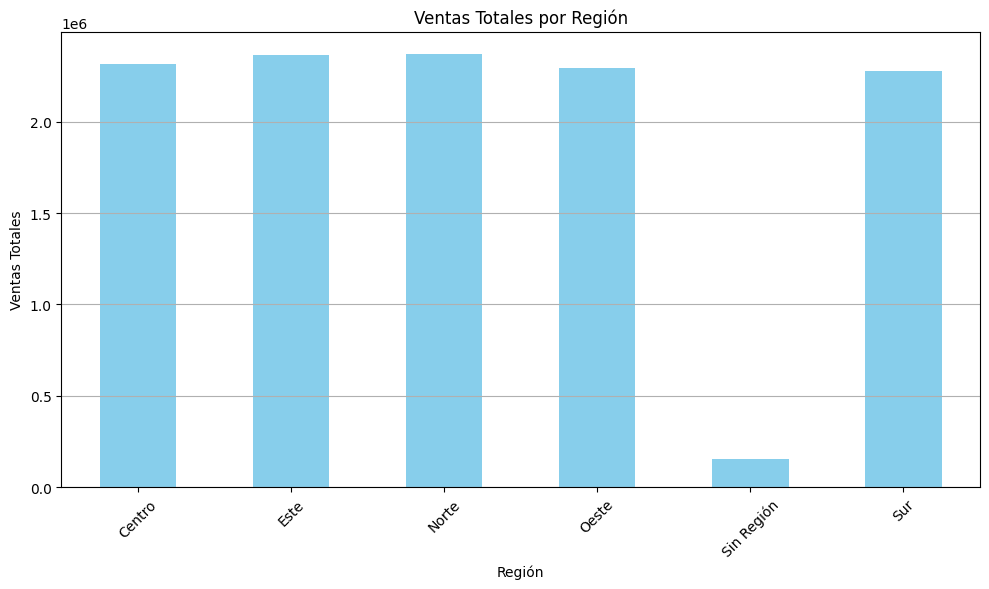

In [12]:
import matplotlib.pyplot as plt

# Gráfico de ventas por región
plt.figure(figsize=(10, 6))
df.groupby('Region')['Total'].sum().plot(kind='bar', color='skyblue')

plt.title('Ventas Totales por Región')
plt.xlabel('Región')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\ALEJANDRO\AppData\Local\Temp\ipykernel_15796\4290903219.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Producto', y='Precio_Unitario', palette='pastel')


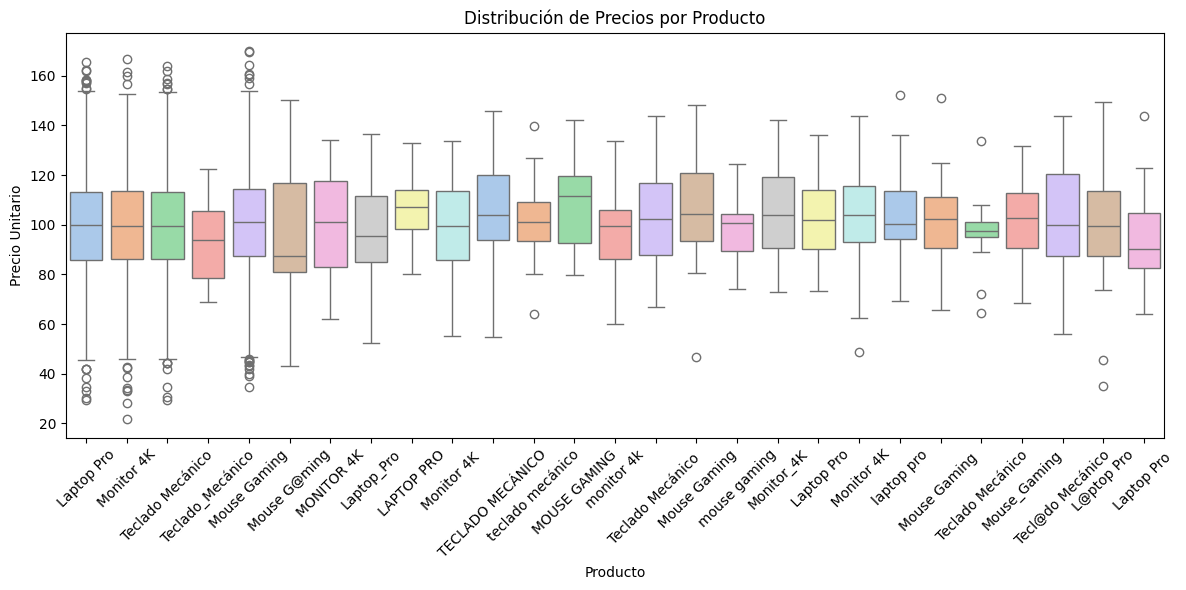

In [14]:
# Boxplot de precios por producto
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Producto', y='Precio_Unitario', palette='pastel')

plt.title('Distribución de Precios por Producto')
plt.xlabel('Producto')
plt.ylabel('Precio Unitario')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


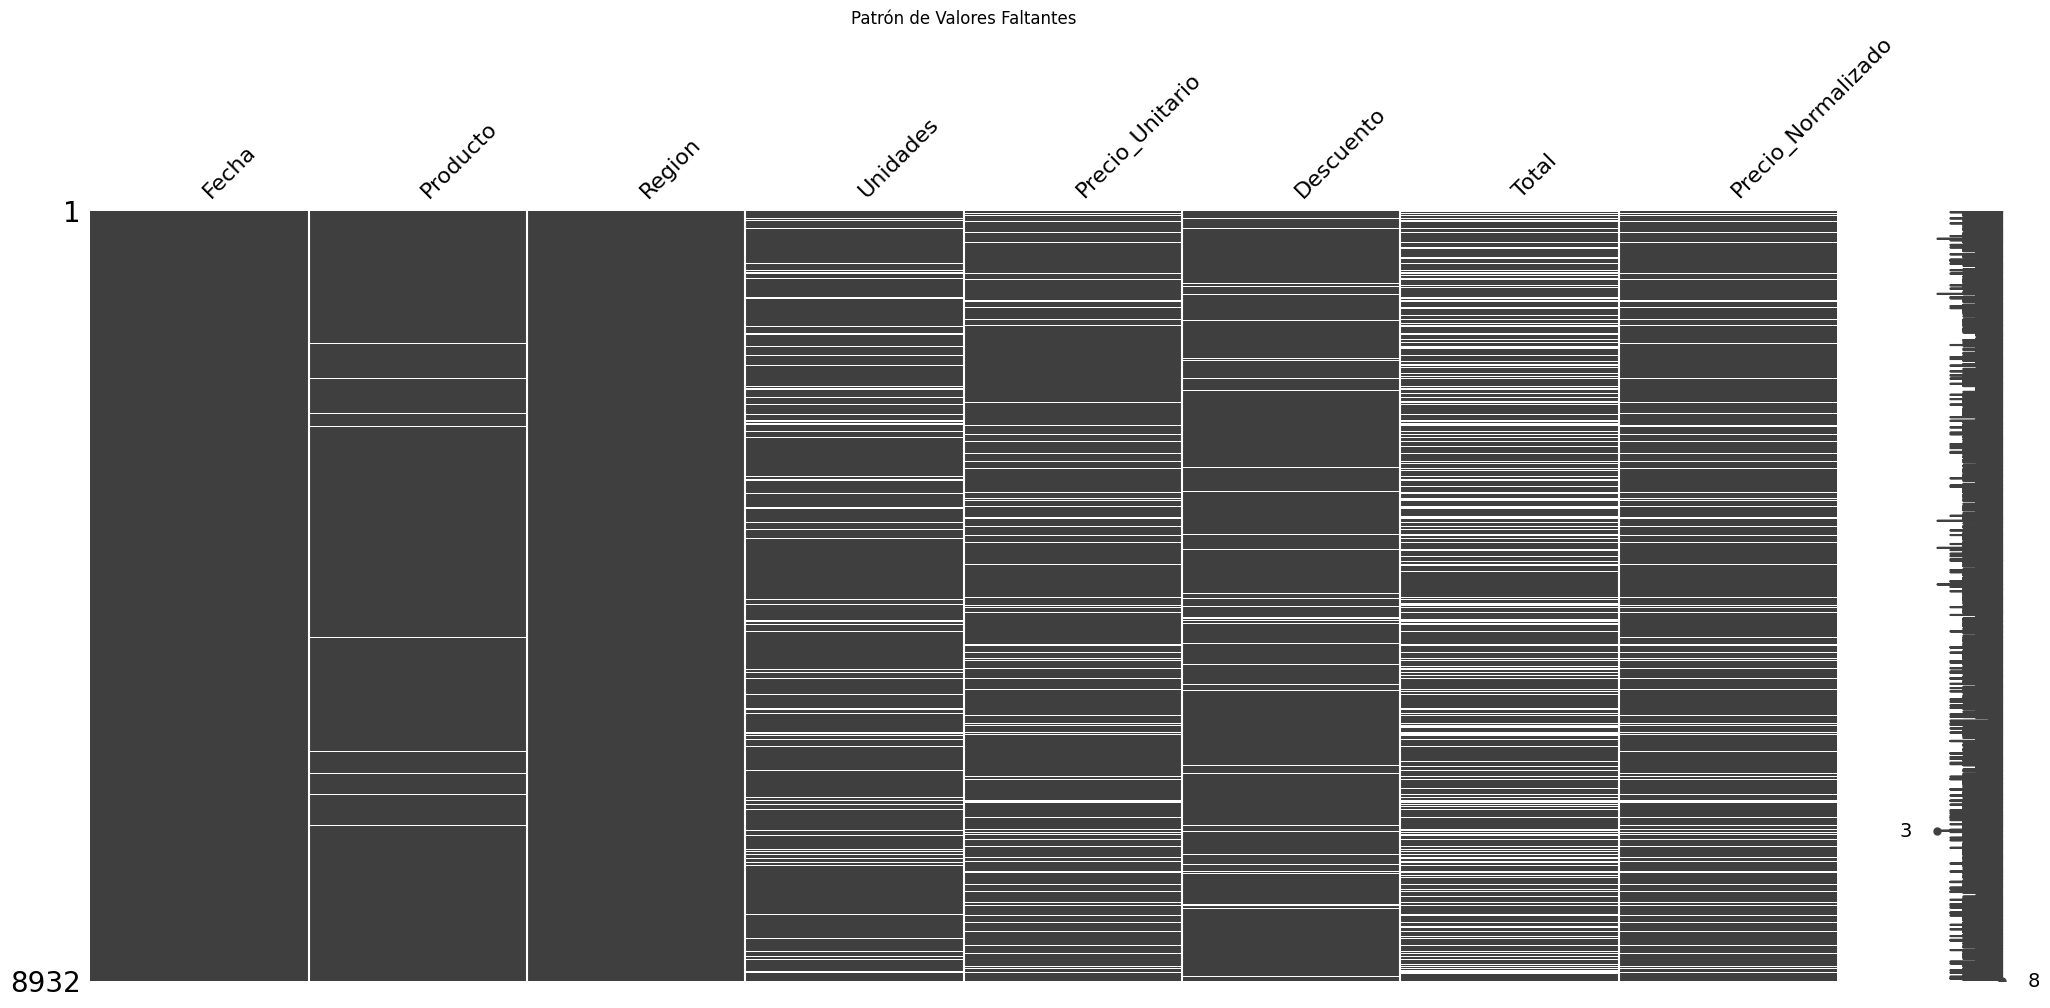

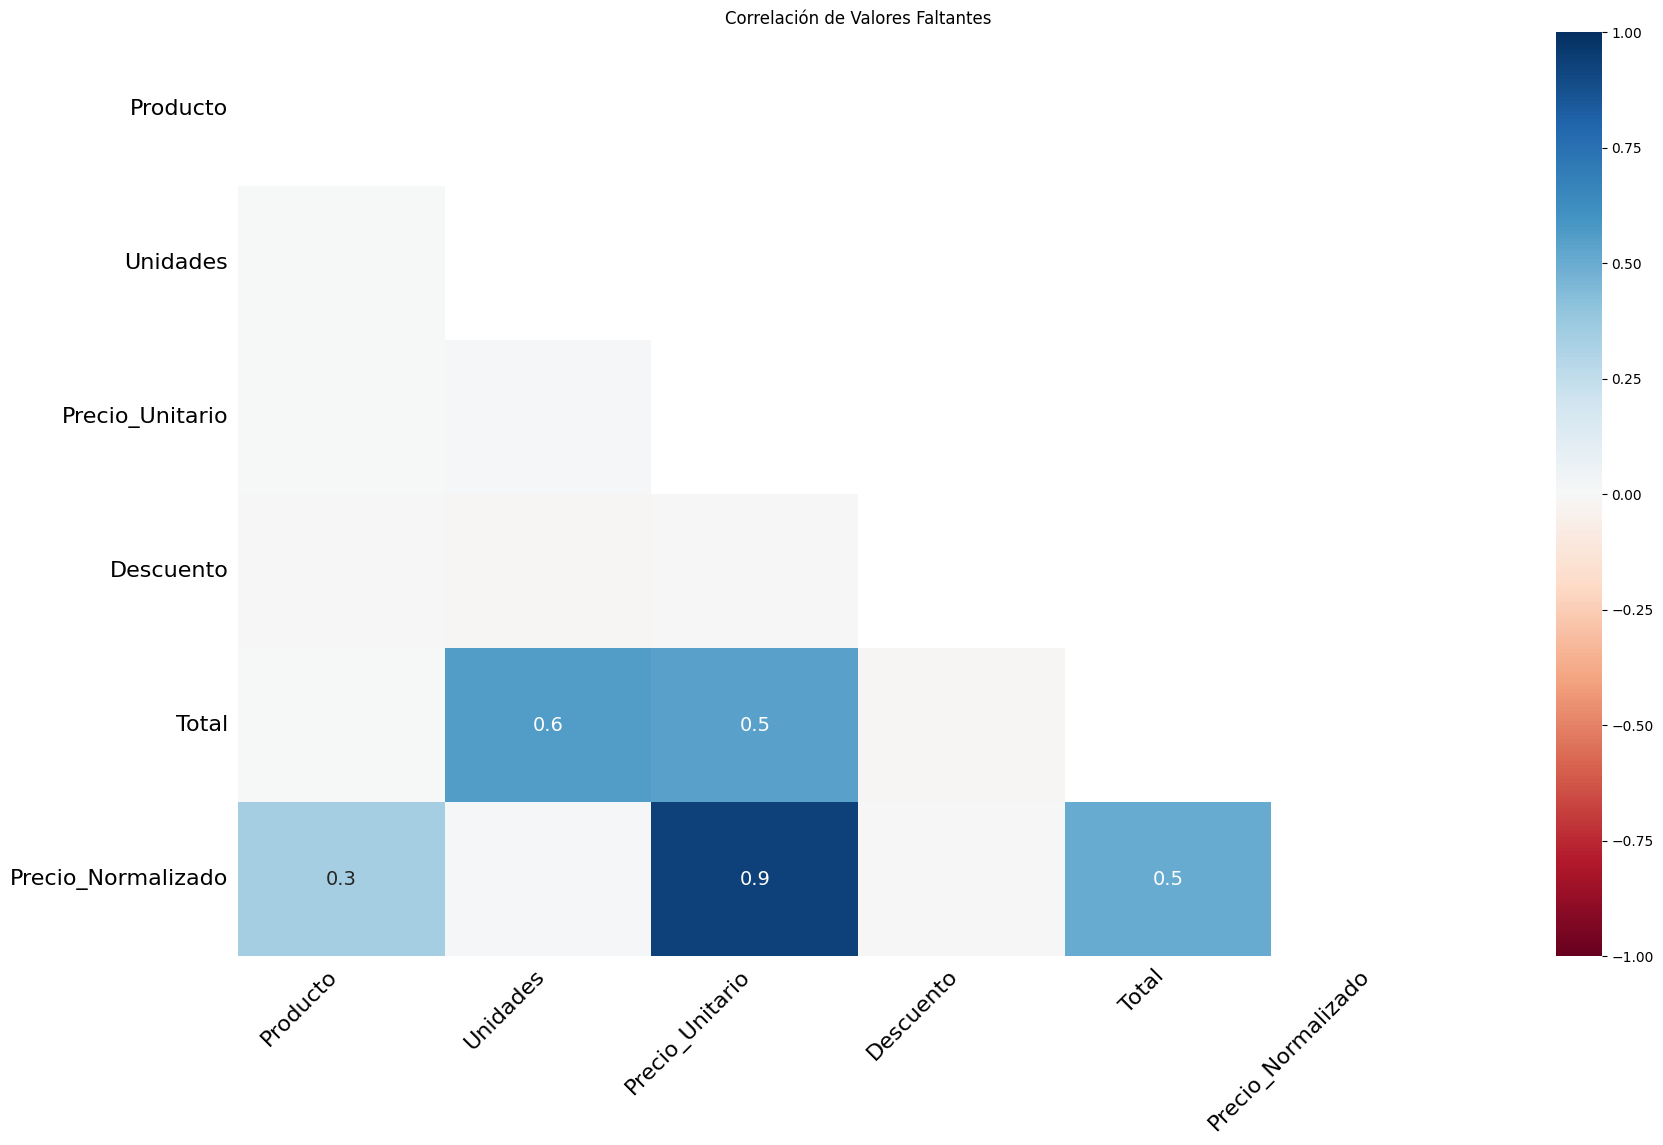

In [17]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualizar la matriz de valores faltantes
msno.matrix(df)
plt.title('Patrón de Valores Faltantes')
plt.show()

# Visualizar la correlación de valores faltantes entre columnas
msno.heatmap(df)
plt.title('Correlación de Valores Faltantes')
plt.show()

In [18]:
lambda argumentos: expresión


<function __main__.<lambda>(argumentos)>

In [19]:
df = df.replace(['---', 'N/A', 'null'], np.nan)


In [20]:
print(df.isnull().sum())

Fecha                    0
Producto               126
Region                   0
Unidades               913
Precio_Unitario        863
Descuento              375
Total                 2379
Precio_Normalizado     976
dtype: int64


In [21]:
reemplazos = {
    'Norte': 'NORTE',
    'Sur': 'SUR',
    'Este': 'ESTE',
    'Oeste': 'OESTE'
}
df['Region'] = df['Region'].replace(reemplazos)


In [ ]:
#en resumen
1. Descripción de valores atípicos encontrados
Durante el análisis, se detectaron valores atípicos principalmente en:

Precio_Unitario: Algunos productos tenían precios exageradamente altos o bajos.

Unidades: En algunos casos se encontraron cantidades irrealmente grandes o pequeñas.

 Estos valores se visualizaron con:

Boxplots por producto (Seaborn)

Distribuciones por región y categoría

Decisión tomada: Los outliers fueron conservados, pero visualmente identificados. Si fuera un análisis predictivo, se considerarían técnicas como winsorización o segmentación.

2. Justificación de imputación de valores faltantes
Se aplicaron distintos métodos según el tipo de dato:

Columna	Tipo de dato	Método de imputación	    Justificación
Fecha	Temporal	    forward fill (ffill)	    Se asume que las filas vacías pertenecen a la fecha anterior.
Region	Categórica	    Relleno con "Sin Región"	Mantiene la fila sin perder información.

3. Transformaciones aplicadas
Se aplicaron transformaciones para normalizar y estandarizar los datos:

Limpieza de columnas con texto:

Uso de str.strip() y str.title() para estandarizar formatos (Region, Producto).

Conversión de texto numérico:

Uso de regex y apply(lambda) para extraer números desde campos como Precio_Unitario y Unidades.

Creación de nuevas variables:

Total = Unidades × Precio_Unitario

Precio_Normalizado usando groupby().transform() con Z-score.

4. Análisis de patrones en valores faltantes
Se utilizaron herramientas para detectar nulos:

df.isnull().sum() para resumen general.

missingno.matrix() para visualizar la ubicación y distribución de nulos.

missingno.heatmap() para explorar correlación entre nulos.

 Hallazgo clave: Los valores faltantes estaban concentrados en ciertas columnas como Fecha y Region, con patrones de bloque (ideal para ffill).

5. Interpretación de visualizaciones generadas
Visualización	                                      	           Lo que mostró
Barras de Ventas por Región	Regiones con mayor volumen de ventas.  Permite identificar focos comerciales.
Boxplot de Precios por Producto	Rango de precios por producto y detección visual de outliers.
Gráfico con Seaborn	Se observó variabilidad significativa en Precio_Unitario según el producto.
Distribución de valores faltantes	Patrón claro en campos específicos.
